## Preparation
(1) Download all necessary packages

In [1]:
import matplotlib.pyplot as plt; import numpy as np; import netCDF4; from netCDF4 import Dataset
import pandas as pd; import numpy.ma as ma; import time as timeit; import os; import math; import re
import itertools; import scipy.io; import mat73; import collections
import cartopy; import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from matplotlib.ticker import FuncFormatter
from matplotlib.ticker import AutoMinorLocator; from matplotlib.ticker import FixedLocator
from shapely.geometry import Point; from shapely.geometry.polygon import Polygon
%matplotlib inline
import statistics; import xarray as xr; from scipy.interpolate import griddata
from matplotlib.path import Path; from numpy import nan; import gsw

In [2]:
import matplotlib as mpl

(2) Load polygon shape files (w = GB, x = NMAB, y = EGoM, t = WGoM, v = SMAB)

In [3]:
neww = [['', '', '40.00', '', '', '69.50'], ['', '', '40.30', '', '', '68.00'], ['', '', '40.40', '', '', '67.50'], ['', '', '40.60', '', '', '67.00'], ['', '', '40.80', '', '', '66.50'], ['', '', '41.45', '', '', '66.00'], ['', '', '41.80', '', '', '65.70'], ['', '', '42.10', '', '', '66.00'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '41.80', '', '', '68.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.00', '', '', '69.50'], ['', '', '40.00', '', '', '69.50']]
lon_w = []; lat_w = []
for i in range(14): 
    w1 = neww[i][2]
    lat_w.append(w1)
    w3 = neww[i][5]
    lon_w.append(w3)
lonlist_w = [float(i) for i in lon_w]; latlist_w = [float(i) for i in lat_w]
lonlist_wneg = [float(i)*-1 for i in lon_w]
df_w = pd.DataFrame({'lon': lonlist_w, 'lat': latlist_w,})
df_w_plottable = pd.DataFrame({'lon': lonlist_wneg, 'lat': latlist_w,})

lonlist_w_plot = [float(i)*-1 for i in lon_w]; latlist_w = [float(i) for i in lat_w]
df_w_plot = pd.DataFrame({'lon': lonlist_w_plot, 'lat': latlist_w,})
x_w = df_w_plot['lon']; y_w = df_w_plot['lat']
polygon_w = Polygon(df_w.values)

In [4]:
newv = [['', '', '37.00', '', '', '76.00'], ['', '', '36.00', '', '', '75.50'], ['', '', '35.50', '', '', '75.00'], ['', '', '36.00', '', '', '74.75'], ['', '', '37.40', '', '', '74.50'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.50', '', '', '74.00'], ['', '', '39.40', '', '', '74.25'], ['', '', '37.00', '', '', '76.00']]
lon_v = []; lat_v = []
for i in range(9): 
    v1 = newv[i][2]
    lat_v.append(v1)
    v3 = newv[i][5]
    lon_v.append(v3)
lonlist_v = [float(i) for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v = pd.DataFrame({'lon': lonlist_v, 'lat': latlist_v,})
lonlist_v_plot = [float(i)*-1 for i in lon_v]; latlist_v = [float(i) for i in lat_v]
df_v_plot = pd.DataFrame({'lon': lonlist_v_plot, 'lat': latlist_v,})
x_v = df_v_plot['lon']; y_v = df_v_plot['lat']

lonlist_vneg = [float(i)*-1 for i in lon_v]
df_v_plottable = pd.DataFrame({'lon': lonlist_vneg, 'lat': latlist_v,})
polygon_v = Polygon(df_v.values.tolist())

In [5]:
newx = [['', '', '40.50', '', '', '74.00'], ['', '', '39.50', '', '', '72.00'], ['', '', '40.00', '', '', '71.40'], ['', '', '40.00', '', '', '69.50'], ['', '', '41.00', '', '', '69.50'], ['', '', '41.10', '', '', '70.00'], ['', '', '41.00', '', '', '72.00'], ['', '', '40.50', '', '', '74.00']]
lon_x = []; lat_x = []
for i in range(8): 
    x1 = newx[i][2]
    lat_x.append(x1)
    x3 = newx[i][5]
    lon_x.append(x3)
lonlist_x = [float(i) for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x = pd.DataFrame({'lon': lonlist_x, 'lat': latlist_x,})
lonlist_x_plot = [float(i)*-1 for i in lon_x]; latlist_x = [float(i) for i in lat_x]
df_x_plot = pd.DataFrame({'lon': lonlist_x_plot, 'lat': latlist_x,})
x_x = df_x_plot['lon']; y_x = df_x_plot['lat']

lonlist_xneg = [float(i)*-1 for i in lon_x]
df_x_plottable = pd.DataFrame({'lon': lonlist_xneg, 'lat': latlist_x,})
polygon_x = Polygon(df_x.values.tolist())

In [6]:
newy = [['', '', '41.80', '', '', '68.00'], ['', '', '42.10', '', '', '67.50'], ['', '', '42.10', '', '', '67.00'], ['', '', '42.10', '', '', '66.00'], ['', '', '43.00', '', '', '66.00'], ['', '', '44.20', '', '', '66.50'], ['', '', '44.20', '', '', '67.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '41.80', '', '', '68.00']]
lon_y = []; lat_y = []
for i in range(9): 
    y1 = newy[i][2]
    lat_y.append(y1)
    y3 = newy[i][5]
    lon_y.append(y3)
lonlist_y = [float(i) for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y = pd.DataFrame({'lon': lonlist_y, 'lat': latlist_y,})
lonlist_y_plot = [float(i)*-1 for i in lon_y]; latlist_y = [float(i) for i in lat_y]
df_y_plot = pd.DataFrame({'lon': lonlist_y_plot, 'lat': latlist_y,})
x_y = df_y_plot['lon']; y_y = df_y_plot['lat']

lonlist_yneg = [float(i)*-1 for i in lon_y]
df_y_plottable = pd.DataFrame({'lon': lonlist_yneg, 'lat': latlist_y,})
polygon_y = Polygon(df_y.values)

In [7]:
newt = [['', '', '42.20', '', '', '70.50'], ['', '', '42.00', '', '', '70.00'], ['', '', '41.10', '', '', '69.00'], ['', '', '41.80', '', '', '68.00'], ['', '', '44.20', '', '', '68.00'], ['', '', '43.90', '', '', '69.00'], ['', '', '43.70', '', '', '70.00'], ['', '', '43.00', '', '', '70.50'], ['', '', '42.20', '', '', '70.50']]
lon_t = []; lat_t = []
for i in range(9): 
    t1 = newt[i][2]
    lat_t.append(t1)
    t3 = newt[i][5]
    lon_t.append(t3)
lonlist_t = [float(i) for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t = pd.DataFrame({'lon': lonlist_t, 'lat': latlist_t,})
lonlist_t_plot = [float(i)*-1 for i in lon_t]; latlist_t = [float(i) for i in lat_t]
df_t_plot = pd.DataFrame({'lon': lonlist_t_plot, 'lat': latlist_t,})
x_t = df_t_plot['lon']; y_t = df_t_plot['lat']

lonlist_tneg = [float(i)*-1 for i in lon_t]
df_t_plottable = pd.DataFrame({'lon': lonlist_tneg, 'lat': latlist_t,})
polygon_t = Polygon(df_t.values)

(3) Temperature-based MLDs

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memo

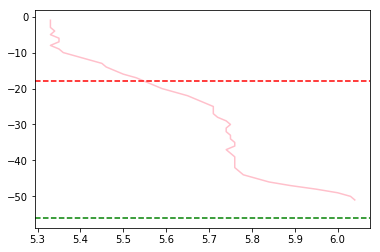

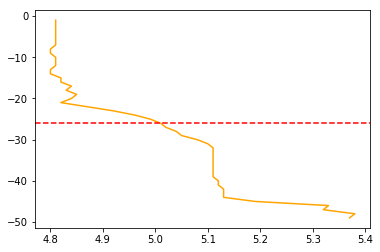

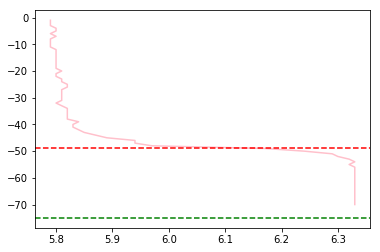

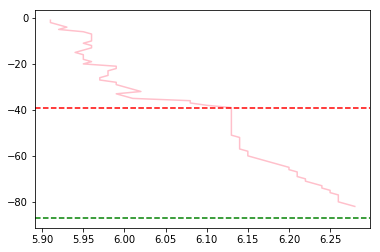

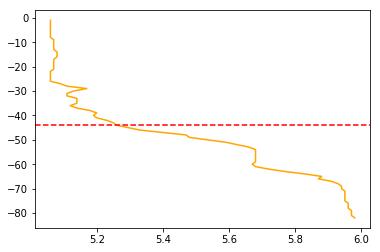

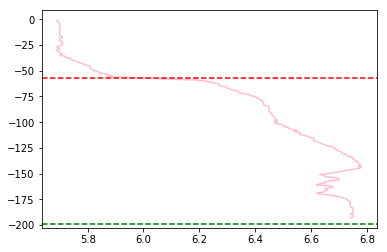

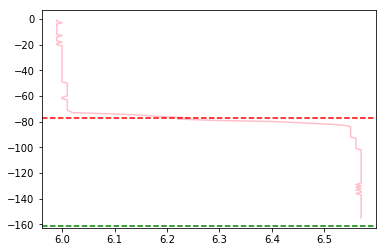

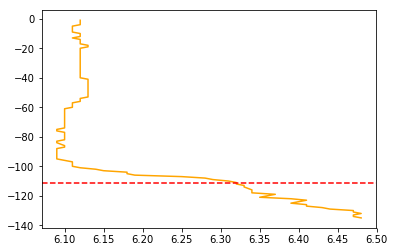

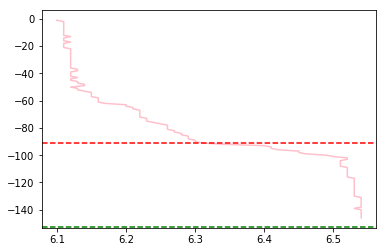

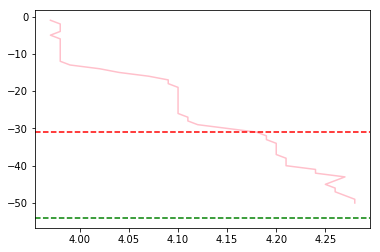

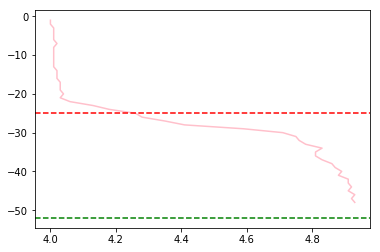

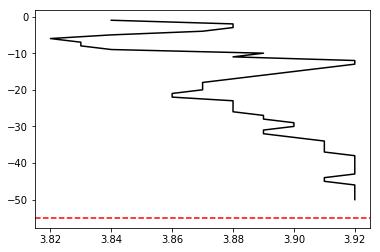

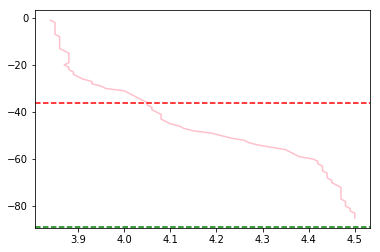

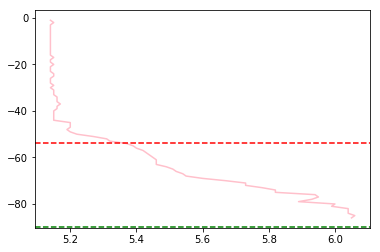

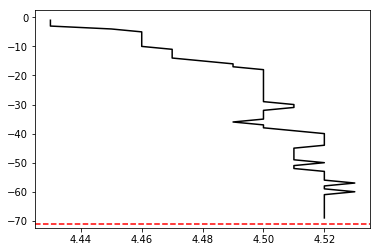

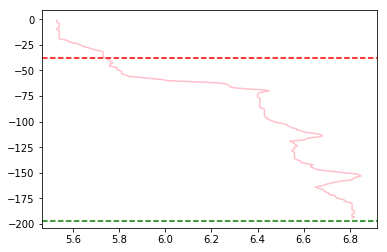

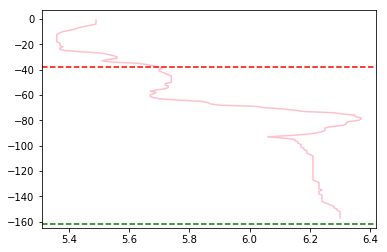

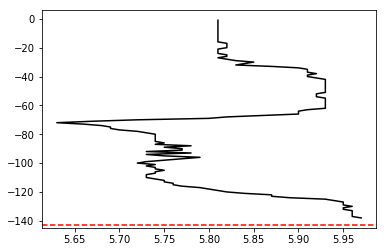

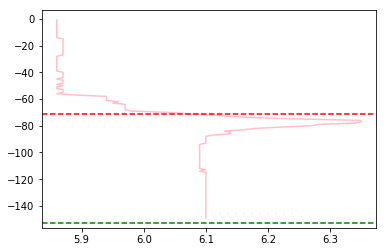

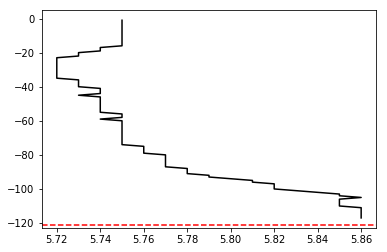

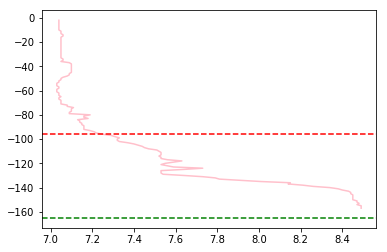

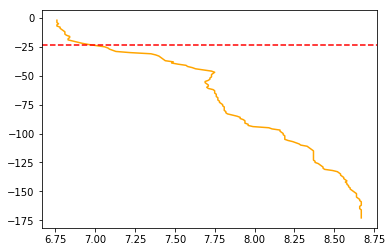

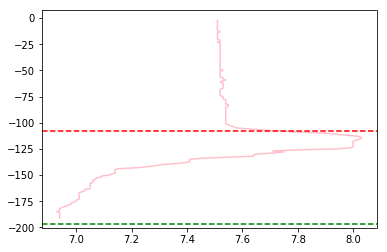

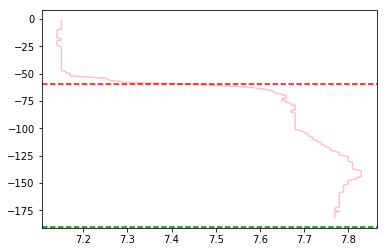

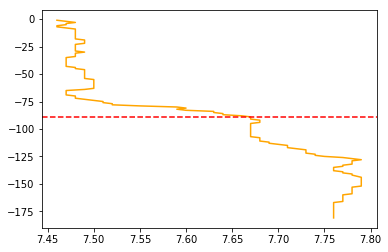

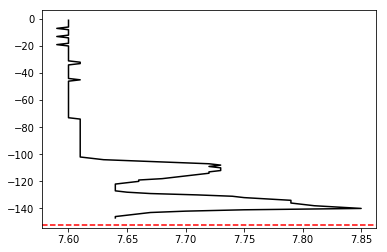

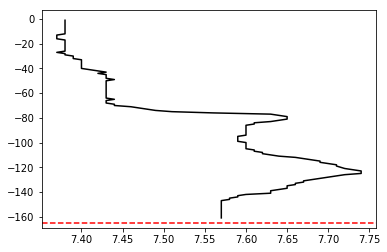

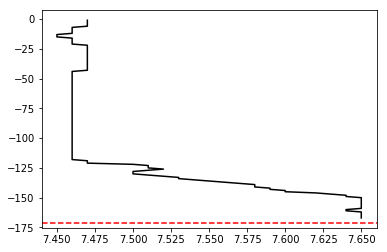

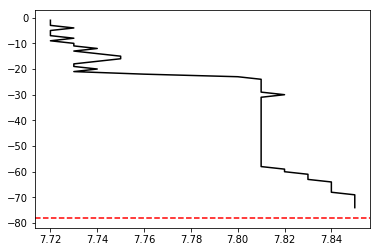

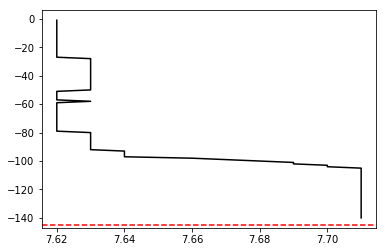

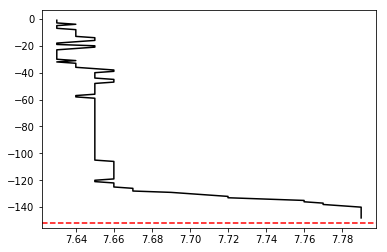

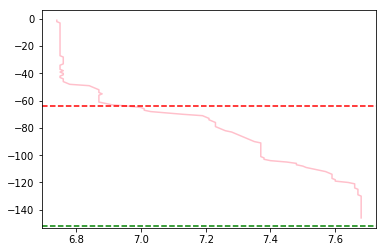

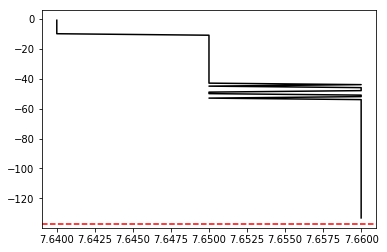

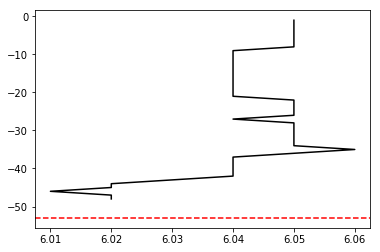

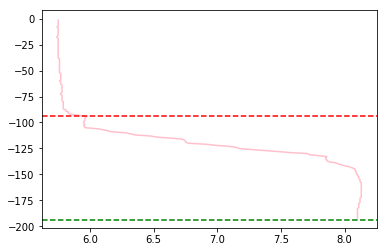

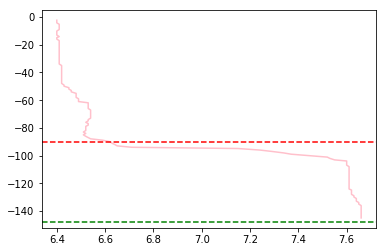

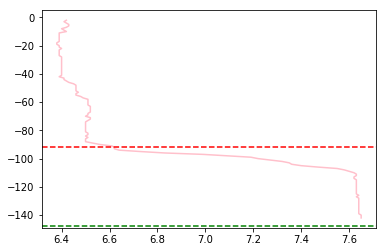

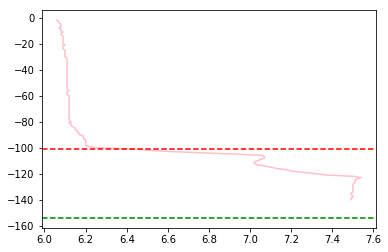

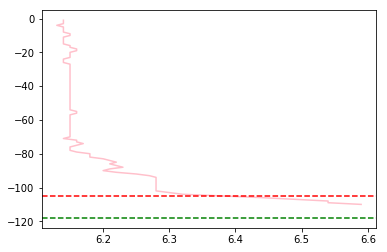

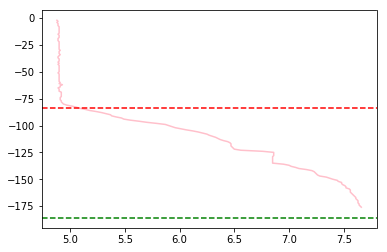

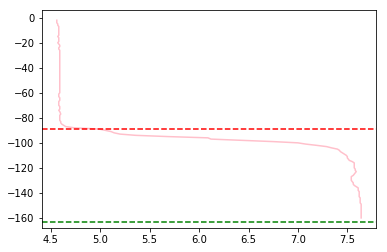

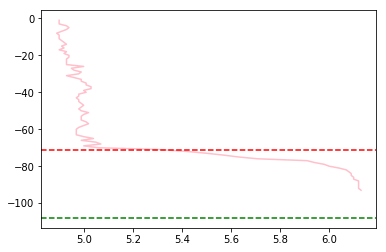

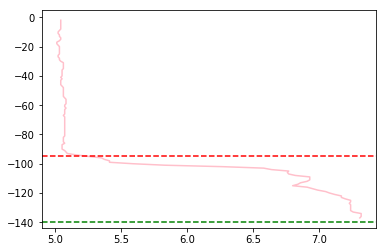

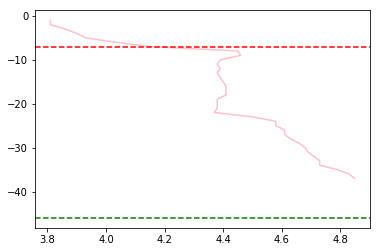

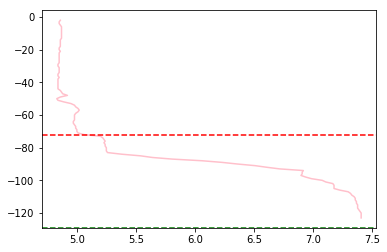

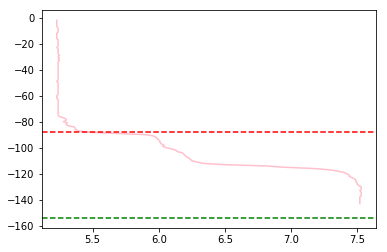

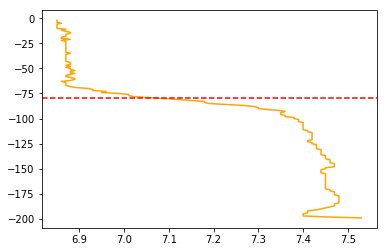

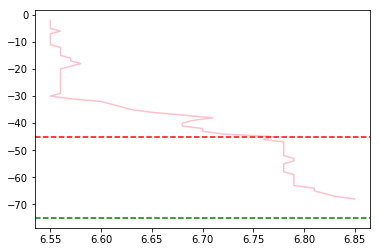

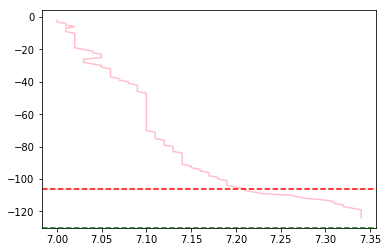

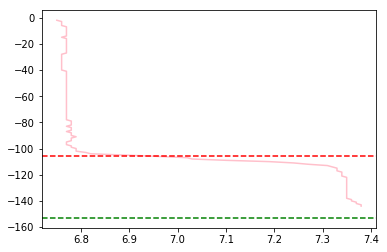

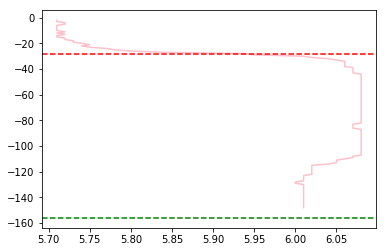

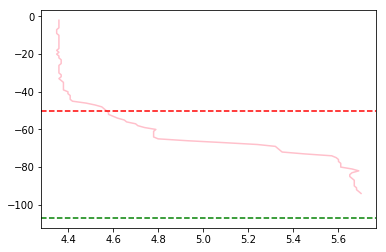

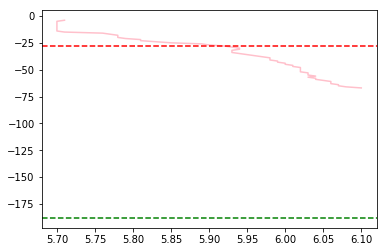

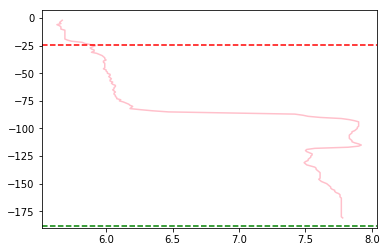

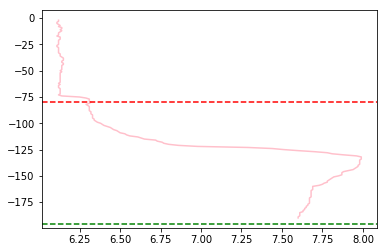

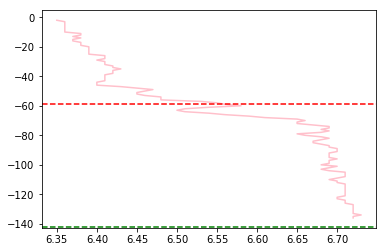

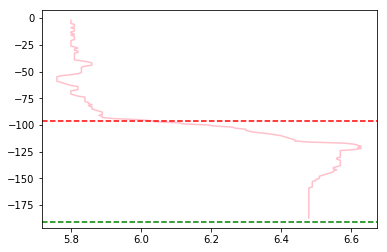

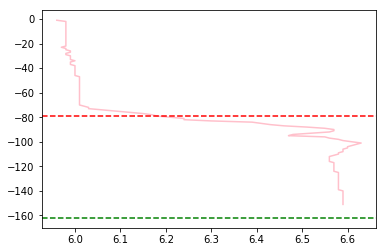

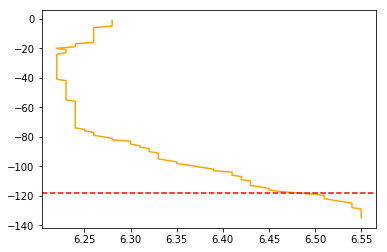

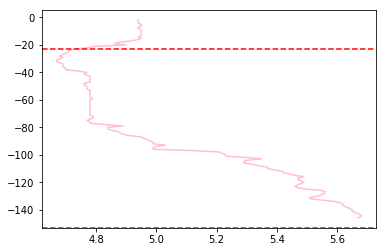

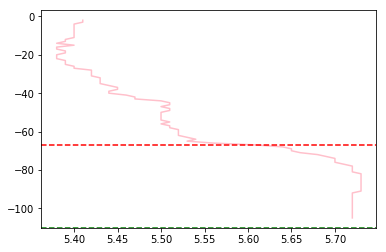

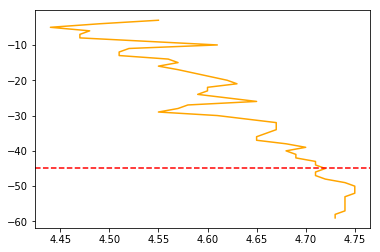

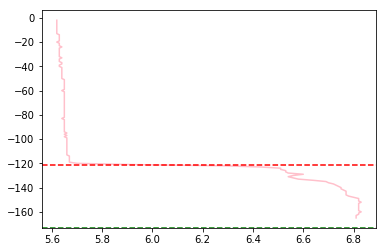

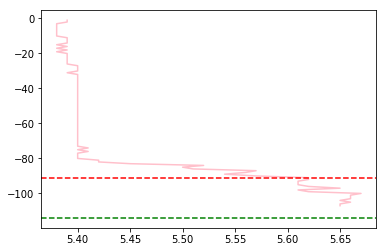

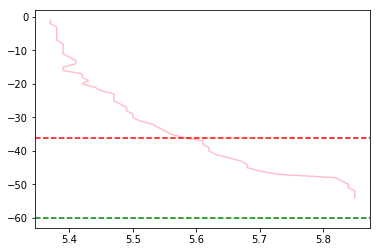

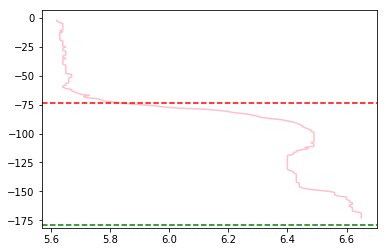

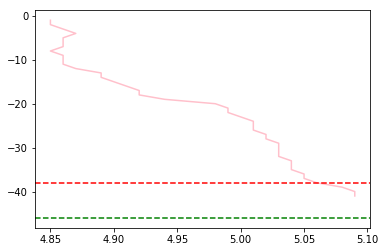

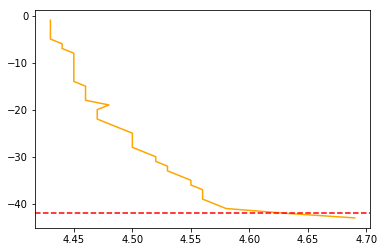

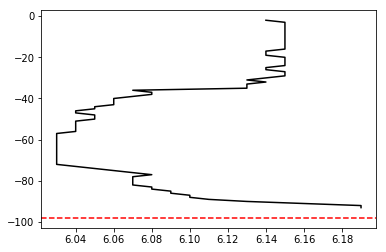

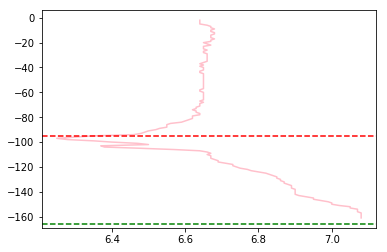

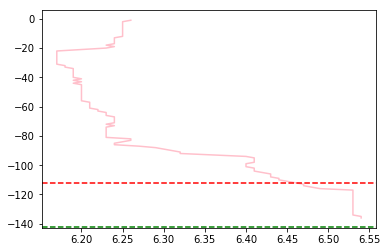

In [74]:
seasonyeardepth = []; countwithinpolygon = []; correctedwospatdiffmean = []
ratio_of_water_column = []; now = []; later = []; ratio_of_water_column_corrected = []
for year in range(1993,2000):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    seasonyeardepth2 = []; ratio_of_water_column2 = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if yd >= 0 and yd <= 31 and floordepth <= 200:
#         if yd > 334 and yd <= 365 and floordepth <= 200:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_t.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)
            l=[i for i in df_final[0] if i<=4] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[1][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'temp'] >= (surfacevalmean - 0.2) and dffinunreversed.at[ix,'temp'] <= (surfacevalmean + 0.2):
                    if dffinunreversed.at[len(dffinunreversed)-1,'temp'] <= (surfacevalmean + 0.2) and dffinunreversed.at[len(dffinunreversed)-1,'temp'] >= (surfacevalmean - 0.2):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.2)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.2)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5):
                                if dffinunreversed.at[ix,'pressure'] <= 5.0:
                                    pass
                                else:
                                    fig, (ax1) = plt.subplots(1,1)
                                    ax1.plot(df_final[1],df_final[0]*-1,color='purple')
                                    ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                                    break
                            else:
                                fig, (ax1) = plt.subplots(1,1)
                                ax1.plot(df_final[1],df_final[0]*-1,color='blue')
                                ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                                break
                        else:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5):
                                fig, (ax1) = plt.subplots(1,1)
                                seasonyeardepth.append(month_df['depth'].iloc[ii])
                                ax1.plot(df_final[1],df_final[0]*-1,color='black')
    #                             ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                                ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='r', linestyle='--')
                                break
                            else:
                                pass
                    else:
                        if dffinunreversed.at[ix,'temp'] <= (surfacevalmean - 0.2) or dffinunreversed.at[ix,'temp'] >= (surfacevalmean + 0.2):
                            if dffinunreversed.at[ix,'pressure'] <= 5.0:
                                pass
                            else:
                                if dffinunreversed.at[ix,'pressure'] <= 5.0:
                                    pass
                                else:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                                    fig, (ax1) = plt.subplots(1,1)
                                    ax1.plot(df_final[1],df_final[0]*-1,color='orange')
                                    ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                                    break           
                        else: 
                            if dffinunreversed.at[ix,'temp'] >= (surfacevalmean + 0.2) or dffinunreversed.at[ix,'temp'] <= (surfacevalmean - 0.2):
#                                 pass
#                             else:
#                                 print(surfacevalmean,dffinunreversed.at[ix,'temp'])
                                fig, (ax1) = plt.subplots(1,1)
                                ax1.plot(df_final[1],df_final[0]*-1,color='red')
                                ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                                break
                elif dffinunreversed.at[ix,'temp'] <= (surfacevalmean - 0.2) or dffinunreversed.at[ix,'temp'] >= (surfacevalmean + 0.2):
                    if dffinunreversed.at[ix,'pressure'] <= 5.0:
                        pass
                    else:
                        if dffinunreversed.at[ix,'pressure'] <= 5.0:
                            pass
                        else:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                            ratio_of_water_column.append(ratio_val)
                            ratio_of_water_column2.append(ratio_val)
                            seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                            fig, (ax1) = plt.subplots(1,1)
                            ax1.plot(df_final[1],df_final[0]*-1,color='pink')
                            ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                            ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                            break           
                else: 
                    fig, (ax1) = plt.subplots(1,1)
                    ax1.plot(df_final[1],df_final[0]*-1,color='grey')
                    break
#                     ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                            
#     print(year)
#     print(seasonyeardepth2)
#     print(ratio_of_water_column2)
#     correctedwospatdiffmean.append(np.mean(np.mean(seasonyeardepth2)))
#     ratio_of_water_column_corrected.append(np.mean(np.mean(ratio_of_water_column2)))

In [75]:
print(len(seasonyeardepth))

71


In [76]:
print(len(countwithinpolygon))

90


In [68]:
print(np.mean(seasonyeardepth))

11.359130434782609


(4) Density-based MLDs

1994
[17.0, 23.0, 50.0, 33.0, 62.0, 36.0, 35.0, 8.0, 61.0, 62.0, 79.0]
[0.3148148148148148, 0.4423076923076923, 0.9090909090909091, 0.3707865168539326, 0.6888888888888889, 0.5070422535211268, 0.17766497461928935, 0.04938271604938271, 0.42657342657342656, 0.40522875816993464, 0.6528925619834711]


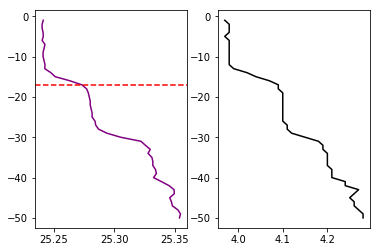

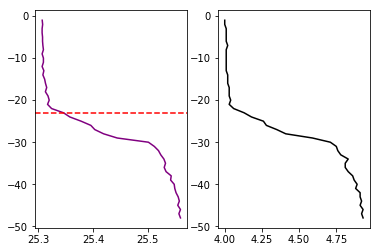

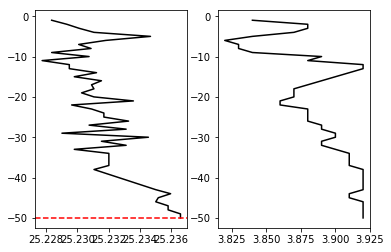

In [ ]:
seasonyeardepth = []; countwithinpolygon = []; correctedwospatdiffmean = []
ratio_of_water_column = []; now = []; later = []; ratio_of_water_column_corrected = []
for year in range(1994,1995):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    floor_intermediate = []; surfaceval_list = []
    seasonyeardepth2 = []; ratio_of_water_column2 = []
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if yd >= 0 and yd <= 31 and floordepth <= 200:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})
    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_t.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            countwithinpolygon.append(1)

            l=[i for i in df_final[0] if i<=4] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            if dffinunreversed.at[len(dffinunreversed)-1,'pressure'] >= (month_df['depth'].iloc[ii] - 5):
                                if dffinunreversed.at[ix,'pressure'] <= 5.0:
                                    pass
                                else:
                                    fig, (ax1,ax2) = plt.subplots(1,2)
                                    ax1.plot(df_final[4],df_final[0]*-1,color='black')
                                    ax1.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1, color='r', linestyle='--')
                                    ax2.plot(df_final[1],df_final[0]*-1,color='black')
                                    seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
                                    seasonyeardepth2.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
                                    ratio_val = (dffinunreversed.at[len(dffinunreversed)-1,'pressure'])/(month_df['depth'].iloc[ii])
                                    ratio_of_water_column.append(ratio_val)
                                    ratio_of_water_column2.append(ratio_val)
                                    break
                            else:
#                                 fig, (ax1) = plt.subplots(1,1)
#                                 ax1.plot(df_final[4],df_final[0]*-1,color='black')
#                                 ax1.axhline(y=dffinunreversed.at[len(dffinunreversed)-1,'pressure']*-1, color='r', linestyle='--')
#                                 ax1.axhline(y=month_df['depth'].iloc[ii]*-1, color='green', linestyle='--')
                                later.append(3)
#                                 break
                                pass
                    else:
                        pass
                elif dffinunreversed.at[ix,'density'] <= (surfacevalmean - 0.03) or dffinunreversed.at[ix,'density'] >= (surfacevalmean + 0.03):
                    if dffinunreversed.at[ix,'pressure'] <= 5.0:
                        now.append(2)
#                         break
                        pass
                    else:
                        if dffinunreversed.at[ix,'pressure'] <= 5.0:
                            pass
                        else:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            ratio_val = (dffinunreversed.at[ix,'pressure'])/(month_df['depth'].iloc[ii])
                            ratio_of_water_column.append(ratio_val)
                            ratio_of_water_column2.append(ratio_val)
                            seasonyeardepth2.append(dffinunreversed.at[ix,'pressure'])
                            fig, (ax1, ax2) = plt.subplots(1,2)
                            ax1.plot(df_final[4],df_final[0]*-1,color='purple')
                            ax1.axhline(y=dffinunreversed.at[ix,'pressure']*-1, color='r', linestyle='--')
                            ax2.plot(df_final[1],df_final[0]*-1,color='black')
                    break
    print(year)
    print(seasonyeardepth2)
    print(ratio_of_water_column2)
    correctedwospatdiffmean.append(np.mean(np.mean(seasonyeardepth2)))
    ratio_of_water_column_corrected.append(np.mean(np.mean(ratio_of_water_column2)))
    

In [56]:
print(seasonyeardepth)

[31.0, 25.0, 55, 36.0, 54.0, 71, 38.0, 38.0, 143, 71.0, 121]


In [ ]:
dens = [17.0, 23.0, 50.0, 33.0, 62.0, 36.0, 35.0, 8.0, 61.0, 62.0, 79.0]
temp = [31.0, 25.0, 55, 36.0, 54.0, 71, 38.0, 38.0, 143, 71.0, 121]

In [421]:
print(len(seasonyeardepth2))

11


In [422]:
print(len(countwithinpolygon))

11


In [386]:
print(np.nanmean(correctedwospatdiffmean))
print(np.nanstd(correctedwospatdiffmean))

38.901558286397
6.8156207202231105


In [387]:
q75, q25 = np.nanpercentile(correctedwospatdiffmean, [75 ,25])
# print(q75)
# print(q25)

In [388]:
print(len(seasonyeardepth))
print(len(countwithinpolygon))
difference = len(countwithinpolygon) - len(seasonyeardepth)
print(difference)
print(np.nanmean(correctedwospatdiffmean))
print(np.nanstd(correctedwospatdiffmean))
print(np.nanmax(correctedwospatdiffmean))
print(np.nanmin(correctedwospatdiffmean))
print(q25)
print(q75)

140
169
29
38.901558286397
6.8156207202231105
50.88
27.193548387096776
36.5
43.55555555555556


In [389]:
rq75, rq25 = np.nanpercentile(ratio_of_water_column_corrected, [75 ,25])
print(np.nanmean(ratio_of_water_column_corrected))
print(np.nanstd(ratio_of_water_column_corrected))
print(np.nanmax(ratio_of_water_column_corrected))
print(np.nanmin(ratio_of_water_column_corrected))
print(rq25)
print(rq75)

0.5345071121855979
0.07590687648011568
0.6167291481245891
0.4150981109100234
0.4709403331224962
0.6160043829380213


In [393]:
d_seasonyeardepth_len.append(len(seasonyeardepth))
d_countwithinpolygon_list.append(len(countwithinpolygon))
d_diff.append(difference)
d_mld_mean.append(np.nanmean(correctedwospatdiffmean))
d_mld_std.append(np.nanstd(correctedwospatdiffmean))
d_mld_max.append(np.nanmax(correctedwospatdiffmean))
d_mld_min.append(np.nanmin(correctedwospatdiffmean))
d_mld_q25.append(q25)
d_mld_q75.append(q75)

d_ratio_mean.append(np.nanmean(ratio_of_water_column_corrected))
d_ratio_std.append(np.nanstd(ratio_of_water_column_corrected))
d_ratio_max.append(np.nanmax(ratio_of_water_column_corrected))
d_ratio_min.append(np.nanmin(ratio_of_water_column_corrected))
d_ratio_q25.append(rq25)
d_ratio_q75.append(rq75)

In [394]:
print('dc_seasonyeardepth_len =',d_seasonyeardepth_len)
print('dc_countwithinpolygon_list =',d_countwithinpolygon_list)
print('dc_diff =',d_diff)
print('dc_mld_mean =',d_mld_mean)
print('dc_mld_std =',d_mld_std)
print('dc_mld_max =',d_mld_max)
print('dc_mld_min =',d_mld_min)
print('dc_mld_q25 =',d_mld_q25)
print('dc_mld_q75 =',d_mld_q75)

print('dc_ratio_mean =',d_ratio_mean)
print('dc_ratio_std =',d_ratio_std)
print('dc_ratio_max =',d_ratio_max)
print('dc_ratio_min =',d_ratio_min)
print('dc_ratio_q25 =',d_ratio_q25)
print('dc_ratio_q75 =',d_ratio_q75)

dc_seasonyeardepth_len = [140]
dc_countwithinpolygon_list = [169]
dc_diff = [29]
dc_mld_mean = [38.901558286397]
dc_mld_std = [6.8156207202231105]
dc_mld_max = [50.88]
dc_mld_min = [27.193548387096776]
dc_mld_q25 = [36.5]
dc_mld_q75 = [43.55555555555556]
dc_ratio_mean = [0.5345071121855979]
dc_ratio_std = [0.07590687648011568]
dc_ratio_max = [0.6167291481245891]
dc_ratio_min = [0.4150981109100234]
dc_ratio_q25 = [0.4709403331224962]
dc_ratio_q75 = [0.6160043829380213]


In [391]:
d_seasonyeardepth_len = []
d_countwithinpolygon_list = []
d_diff = []
d_mld_mean = []
d_mld_std = []
d_mld_max = []
d_mld_min = []
d_mld_q25 = []
d_mld_q75 = []

d_ratio_mean = []
d_ratio_std = []
d_ratio_max = []
d_ratio_min = []
d_ratio_q25 = []
d_ratio_q75 = []

In [350]:
# q75, q25 = np.percentile(seasonyeardepth, [75 ,25])

In [368]:
# print(len(seasonyeardepth))
# print(len(countwithinpolygon))
# difference = len(countwithinpolygon) - len(seasonyeardepth)
# print(difference)
# print(np.mean(seasonyeardepth))
# print(np.std(seasonyeardepth))
# print(np.max(seasonyeardepth))
# print(np.min(seasonyeardepth))
# print(q25)
# print(q75)

In [375]:
# rq75, rq25 = np.percentile(ratio_of_water_column, [75 ,25])
# print(np.mean(ratio_of_water_column))
# print(np.std(ratio_of_water_column))
# print(np.max(ratio_of_water_column))
# print(np.min(ratio_of_water_column))
# print(rq25)
# print(rq75)

In [353]:
print(t_seasonyeardepth_len)

[140, 219, 157, 887, 759, 440, 78, 358, 516, 1235, 821]


In [354]:
t_seasonyeardepth_len.append(len(seasonyeardepth))
t_countwithinpolygon_list.append(len(countwithinpolygon))
t_diff.append(difference)
t_mld_mean.append(np.mean(seasonyeardepth))
t_mld_std.append(np.nanstd(correctedwospatdiffmean))
t_mld_max.append(np.nanmax(correctedwospatdiffmean))
t_mld_min.append(np.nanmin(correctedwospatdiffmean))
t_mld_q25.append(q25)
t_mld_q75.append(q75)

t_ratio_mean.append(np.mean(ratio_of_water_column))
t_ratio_std.append(np.std(ratio_of_water_column))
t_ratio_max.append(np.max(ratio_of_water_column))
t_ratio_min.append(np.min(ratio_of_water_column))
t_ratio_q25.append(rq25)
t_ratio_q75.append(rq75)

In [377]:
# print('t_seasonyeardepth_len =',t_seasonyeardepth_len)
# print('t_countwithinpolygon_list =',t_countwithinpolygon_list)
# print('t_diff =',t_diff)
# print('t_mld_mean =',t_mld_mean)
# print('t_mld_std =',t_mld_std)
# print('t_mld_max =',t_mld_max)
# print('t_mld_min =',t_mld_min)
# print('t_mld_q25 =',t_mld_q25)
# print('t_mld_q75 =',t_mld_q75)

# print('t_ratio_mean =',t_ratio_mean)
# print('t_ratio_std =',t_ratio_std)
# print('t_ratio_max =',t_ratio_max)
# print('t_ratio_min =',t_ratio_min)
# print('t_ratio_q25 =',t_ratio_q25)
# print('t_ratio_q75 =',t_ratio_q75)

In [272]:
# temp-based
t_seasonyeardepth_len = []
t_countwithinpolygon_list = []
t_diff = []
t_mld_mean = []
t_mld_std = []
t_mld_max = []
t_mld_min = []
t_mld_q25 = []
t_mld_q75 = []

t_ratio_mean = []
t_ratio_std = []
t_ratio_max = []
t_ratio_min = []
t_ratio_q25 = []
t_ratio_q75 = []

In [138]:
# temp-based #NMAB
t_seasonyeardepth_len = [89, 428, 594, 220, 249, 212, 128, 300, 726, 347, 284, 30]
t_countwithinpolygon_list = [147, 663, 1000, 341, 363, 389, 299, 449, 938, 460, 405, 68]
t_diff = [58, 235, 406, 121, 114, 177, 171, 149, 212, 113, 121, 38]
t_mld_mean = [37.50561797752809, 33.455607476635514, 24.042087542087543, 24.95, 11.365461847389557, 9.84433962264151, 8.328125, 9.366666666666667, 15.59641873278237, 23.818443804034583, 30.390845070422536, 33.233333333333334]
t_mld_std = [18.828094950088936, 17.965709585002603, 16.719308169772994, 15.45351534000068, 6.2683443148368605, 4.095477952356888, 2.831489711154713, 3.6284370678786138, 7.276017313467237, 12.312637536750415, 14.864602082144813, 16.944386156548198]
t_mld_max = [86.0, 93.0, 103.0, 78.0, 57.0, 34.0, 33.0, 37.0, 56.0, 65.0, 79.0, 66.0]
t_mld_min = [8.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 11.0]
t_mld_q25 = [23.0, 18.75, 11.0, 12.0, 7.0, 7.0, 7.0, 7.0, 10.0, 13.0, 19.0, 16.25]
t_mld_q75 = [52.0, 46.0, 34.0, 33.0, 13.0, 12.0, 9.0, 11.0, 20.0, 32.5, 40.0, 47.0]

t_ratio_mean = [0.4980040713241173, 0.446254149051543, 0.41171820883905497, 0.3400904147579384, 0.20095622822279352, 0.19803474742755164, 0.14595772252709505, 0.15988591150777637, 0.34458343115667656, 0.34735887388178593, 0.46861587089287543, 0.4720436157339631]
t_ratio_std = [0.22271471527270406, 0.23635110357589506, 0.2156494394030983, 0.19140309518835494, 0.13516773642216806, 0.12030930416646399, 0.06530925480041759, 0.08252359183363969, 0.19264279183143335, 0.19344937926619318, 0.24092903418249068, 0.23154513801061613]
t_ratio_max = [0.9247311827956989, 0.9222222222222223, 0.9210526315789473, 0.8666666666666667, 0.7636363636363637, 0.7619047619047619, 0.6470588235294118, 0.578125, 0.9333333333333333, 0.8913043478260869, 0.9354838709677419, 0.9428571428571428]
t_ratio_min = [0.0847457627118644, 0.03571428571428571, 0.03896103896103896, 0.03954802259887006, 0.034482758620689655, 0.03592814371257485, 0.047619047619047616, 0.05042016806722689, 0.04430379746835443, 0.03278688524590164, 0.046153846153846156, 0.1262135922330097]
t_ratio_q25 = [0.32231404958677684, 0.24055555555555555, 0.24, 0.18612680477087257, 0.10526315789473684, 0.11499374609130707, 0.10870693233706932, 0.10526315789473684, 0.1836734693877551, 0.1875, 0.2559722885809842, 0.26918158567774936]
t_ratio_q75 = [0.6785714285714286, 0.6395440251572326, 0.5714285714285714, 0.4562356979405034, 0.24, 0.2512254901960784, 0.1673728813559322, 0.1875, 0.4660714285714286, 0.4774423337856174, 0.6780645161290323, 0.6439393939393939]

In [ ]:
# temp-based #SMAB
seasonyeardepth_len = [107, 668, 1103, 91, 383, 327, 444, 546, 1526, 119, 293 ]
countwithinpolygon_list = [169, 1178, 2035, 174, 649, 508, 818, 728, 1982, 174, 572 ]
diff = [62, 510, 932, 83, 266, 181, 374, 182, 456, 55, 279 ]
mld_mean = [39.88785046728972, 30.251497005988025, 22.786038077969174, 29.164835164835164, 10.10443864229765, 8.825688073394495, 9.144144144144144, 9.6007326007326, 13.540629095674968, 24.10924369747899, 24.341296928327644 ]
mld_std = [22.261540996279702, 21.53307400725885, 17.30818998636689, 23.091439704145603, 4.840490247247957, 2.9236273708561464, 2.613536649266718, 3.0215828357434678, 6.210008673911638, 12.055745808162667, 13.680143092874665 ]
mld_max = [110.0, 136.0, 115.0, 103.0, 49.0, 21.0, 30.0, 22.0, 51.0, 56.0, 86.0 ]
mld_min = [6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0, 6.0 ]
mld_q25 = [30.5, 14.0, 10.0, 12.0, 7.0, 7.0, 7.0, 7.0, 9.0, 15.0, 13.0 ]
mld_q75 = [50.25, 40.25, 31.0, 42.0, 12.0, 10.0, 11.0, 11.0, 17.0, 31.0, 33.0 ]

ratio_mean = [0.48158829159255745, 0.4488050616945592, 0.3957337577632309, 0.3448398794027648, 0.21402132412712607, 0.20582380434825487, 0.17322241545747089, 0.21048252120873587, 0.3305380187966853, 0.41478775388899014, 0.43038520619986576 ]
ratio_std = [0.22919342587608713, 0.22971229754255093, 0.21134548469257103, 0.2196056068310176, 0.11654191345782507, 0.10578124707385436, 0.07455384403230025, 0.12144952783438902, 0.1986352187749512, 0.19952793202602598, 0.22284839641075074 ]
ratio_max = [0.9052631578947369, 0.9416666666666667, 0.9351851851851852, 0.8260869565217391, 0.76, 0.7272727272727273, 0.5084745762711864, 0.7727272727272727, 0.9, 0.8536585365853658, 0.9210526315789473 ]
ratio_min = [0.03314917127071823, 0.03428571428571429, 0.04225352112676056, 0.04316546762589928, 0.03821656050955414, 0.04142011834319527, 0.03684210526315789, 0.03333333333333333, 0.03208556149732621, 0.09090909090909091, 0.047619047619047616]
ratio_q25 = [0.28313511196828456, 0.2612433862433863, 0.21875, 0.15452079566003618, 0.1259920634920635, 0.125, 0.11648550724637681, 0.1206896551724138, 0.16845062093435836, 0.24807692307692308, 0.24 ]
ratio_q75 = [0.6479569892473118, 0.6280730897009967, 0.5643093465674112, 0.526049368672506, 0.27622890682318413, 0.2582010582010582, 0.21285315660969656, 0.27225378787878785, 0.4660714285714286, 0.5642988364972443, 0.6212121212121212 ]

In [58]:
option1 = []; option2 = []; option3 = []; option4 = []; option5 = []; option6 =[]
pointstouse = []; seasonalmean = []; seasonalstd = []; yearwithdata = []
finallatestdepth = []; finalfinaldepth = []; finalfinalratio = []; filteredMLDlist = []
meanfilteredMLDlist = []; stdfilteredMLDlist = []; years = []; bananasplitmean = []
bananasplitstd = [];floormean = [];floorstd = []; latfinal = []; lonfinal = []; ratiofinal = []; date_final = []; year_final = []
bottomdfinal = []; filteredfloorslist = [];zi_listofarrays = []

for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    
    lat_intermediate = []; lon_intermediate = []; yd_intermediate = []
    p_intermediate = []; t_intermediate = []; sal_intermediate = []
    finaldepth = []; finallat = [];finallon = []
    seasonyeardepth = []; seasonyeartemp = [];seasonyearsal = []; seasonyeardens = []
    counterii = []; floors = []; floor_intermediate = []; s_intermediate = []
    seasonyearsal = []; lat = []; lon = []; lonneg = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if gear == 'Bottle':
            pass
        if yd > 31 and yd <= 59:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})

    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_t.contains(point) == True:
#         elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            l=[i for i in df_final[0] if i<=6] 
            if len(l) > 0:
                surfaceval = []; numrange = []
                for iii in range(len(l)):
                    val = df_final[1][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'temp'] >= (surfacevalmean - 0.2) and dffinunreversed.at[ix,'temp'] <= (surfacevalmean + 0.2):
                    if dffinunreversed.at[len(dffinunreversed)-1,'temp'] <= (surfacevalmean + 0.2) and dffinunreversed.at[len(dffinunreversed)-1,'temp'] >= (surfacevalmean - 0.2):
                        looknow = list(dffinunreversed['temp'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.2)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.2)]
                        for now in range(len(looknow)):
                            if looknow[now] >= (surfacevalmean + 0.2):
                                seasonyeardepth.append(list(dffinunreversed['pressure'].values)[now])
                                seasonyeartemp.append(list(dffinunreversed['temp'].values)[now])
                                seasonyearsal.append(list(dffinunreversed['sal'].values)[now])
                                seasonyeardens.append(list(dffinunreversed['density'].values)[now])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                                counterii.append(ii)
                                option1.append(ii) # well-defined MLD
                                break
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[len(dffinunreversed)-1,'temp'])
                            seasonyearsal.append(dffinunreversed.at[len(dffinunreversed)-1,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                            option2.append(ii) # fully mixed profile (from some troublesome profiles)
                        break
                    else:
                        pass                    
                else:
                    if dffinunreversed.at[ix,'pressure'] >= (month_df['depth'].iloc[ii] - 6): # ALL MIXED
                        if dffinunreversed.at[ix,'pressure'] == dffinunreversed.at[len(dffinunreversed)-1,'pressure']:
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 6):
                                pass
                            else:
                                if month_df['depth'].iloc[ii] <= 300:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                    seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                    seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                    floors.append(month_df['depth'].iloc[ii])
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
                                    option3.append(ii)
                        else:
                            if month_df['depth'].iloc[ii] <= 300:
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                                counterii.append(ii)
                                option4.append(ii)
                    elif dffinunreversed.at[ix,'pressure'] == 0:
                        pass
                    elif ix == 0: 
                        if month_df['depth'].iloc[ii] <= 300:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                            option5.append(ii)
                    else: # Well-defined mixed layer detected
                        if month_df['depth'].iloc[ii] <= 300:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                            option6.append(ii)
                            break
                    break

    inlat = []; inlon = []; date = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])                 
    if len(seasonyeardepth) > 0:    
        if len(seasonyeardepth) == 1:  
            std = 0
            seasonalstd.append(std)
        else:
            seasonalstd.append(statistics.stdev(seasonyeardepth))
        yearwithdata.append(year)
        seasonalmean.append(statistics.mean(seasonyeardepth))
        full = pd.DataFrame({'mld': seasonyeardepth,'lat': lat, 'lon': lon, 'date': date, 'year_df': year}) 
        finallatestdepth.append(seasonyeardepth)
        latfinal.append(lat)
        lonfinal.append(lon)
        date_final.append(date)
        year_newfinal = full['year_df'].tolist()
        year_final.append(year_newfinal)

In [59]:
final_temp_mld = sum(finallatestdepth, [])
print(len(final_temp_mld))
print(np.mean(final_temp_mld))
print(np.std(final_temp_mld))

298
72.27483221476511
37.21130309451662


In [60]:
final_lat_temp_mld = sum(latfinal, [])
final_lon_temp_mld = sum(lonfinal, [])
final_date_temp_mld = sum(date_final, [])
final_year_temp_mld = sum(year_final, [])

(4) Accessing observational data : Density threshold method (d = 0.03kg/m3) __Option 1: Well-defined MLD, Option 2: Fully mixed profile, Option 3: Fully mixed, Option 4: Fully mixed, Option 5: At the top of the profile, Option 6: Well-defined MLD

In [62]:
option1 = []; option2 = []; option3 = []; option4 = []; option5 = []; option6 =[]
pointstouse = [];seasonalmean = []; seasonalstd = []; yearwithdata = []; finallatestdepth = []
finalfinaldepth = []; finalfinalratio = []; filteredMLDlist = []; meanfilteredMLDlist = []; stdfilteredMLDlist = []; years = []; bananasplitmean = []; bananasplitstd = [];floormean = [];floorstd = []; latfinal = []; lonfinal = []; ratiofinal = [];bottomdfinal = []; filteredfloorslist = [];zi_listofarrays = []

for year in range(1993,2019):
    filename = 'casts_{}.mat'.format(year)
    file = scipy.io.loadmat(filename,squeeze_me=True)
    npfile = file['casts_{}'.format(year)]
    lat_intermediate = []; lon_intermediate = []; p_intermediate = []; t_intermediate = []; yd_intermediate = []; sal_intermediate = []
    finaldepth = []; finallat = [];finallon = []
    seasonyeardepth = []; seasonyeartemp = [];seasonyearsal = []; seasonyeardens = []; counterii = []; floors = []; floor_intermediate = []; s_intermediate = [];seasonyearsal = []; lat = []; lon = []; lonneg = []
    
    for i in range(len(npfile)):
        yd = npfile[i]['yd']
        p = npfile[i]['p']
        s = npfile[i]['s']
        t = npfile[i]['t']
        gear = npfile[i]['gear']
        floordepth = npfile[i]['depth']
        if gear == 'Bottle':
            pass
        elif yd > 31 and yd <= 59:
            lat_intermediate.append(npfile[i]['lat'])
            lon_intermediate.append(npfile[i]['lon'])
            p_intermediate.append(npfile[i]['p'])
            t_intermediate.append(npfile[i]['t'])
            yd_intermediate.append(npfile[i]['yd'])
            sal_intermediate.append(npfile[i]['s'])
            floor_intermediate.append(npfile[i]['depth'])
    month_df = pd.DataFrame({'day': yd_intermediate,'lon': lon_intermediate,'lat': lat_intermediate, 'p': p_intermediate, 't': t_intermediate,'depth': floor_intermediate, 's': sal_intermediate})
    newdf = pd.DataFrame({'lon': lon_intermediate,'lat': lat_intermediate,'date': yd_intermediate})

    for ii in range(len(month_df)):
        new = newdf.iloc[ii].values
        point = Point(new)
        if isinstance(month_df['p'].iloc[ii], int) or isinstance(month_df['p'].iloc[ii], float) or isinstance(month_df['t'].iloc[ii], int) or isinstance(month_df['t'].iloc[ii], float):
            pass
        elif polygon_t.contains(point) == True:
#         elif polygon_x.contains(point) == True or polygon_y.contains(point) == True or polygon_t.contains(point) == True or polygon_w.contains(point) == True or polygon_v.contains(point) == True:
            CT = gsw.CT_from_pt(month_df['s'].iloc[ii],month_df['t'].iloc[ii])
            DENS = gsw.sigma0(month_df['s'].iloc[ii],CT)
            pt_df = pd.DataFrame({'p': month_df['p'].iloc[ii],'t': month_df['t'].iloc[ii], 's': month_df['s'].iloc[ii], 'CT': CT, 'DENSMLD': DENS}) 
            df_ptsnew = pt_df.dropna()
            df_final = pd.DataFrame(df_ptsnew.values)
            
            l=[i for i in df_final[0] if i<=6] 
            if len(l) > 0:
                surfaceval = []
                numrange = []
                for iii in range(len(l)):
                    val = df_final[4][iii]
                    numrange.append(iii)
                    surfaceval.append(val)            
            surfacevalmean = statistics.mean(surfaceval)
            densfin = []; tempfin = []; pressurefin = []; salfin = []
            for iii in range(numrange[-1],len(df_final)):
                tempfin.append(df_final[1][iii])
                pressurefin.append(df_final[0][iii])
                salfin.append(df_final[2][iii])
                densfin.append(df_final[4][iii])
            d = {'temp': list(reversed(tempfin)), 'sal': list(reversed(salfin)), 'pressure': list(reversed(pressurefin)),'density': list(reversed(densfin))}
            dunreversed = {'temp': list(tempfin), 'sal': list(salfin), 'pressure': list(pressurefin), 'density': list(densfin)}
            dffinunreversed = pd.DataFrame(dunreversed)
            dffin = pd.DataFrame(d)
            for ix in range(len(dffinunreversed)):
                if dffinunreversed.at[ix,'density'] >= (surfacevalmean - 0.03) and dffinunreversed.at[ix,'density'] <= (surfacevalmean + 0.03):
                    if dffinunreversed.at[len(dffinunreversed)-1,'density'] <= (surfacevalmean + 0.03) and dffinunreversed.at[len(dffinunreversed)-1,'density'] >= (surfacevalmean - 0.03):
                        looknow = list(dffinunreversed['density'].values)
                        looknow2 = [i for i in looknow if i >= (surfacevalmean + 0.03)]
                        looknow3 = [i for i in looknow if i <= (surfacevalmean - 0.03)]
                        for now in range(len(looknow)):
                            if looknow[now] >= (surfacevalmean + 0.03):
                                seasonyeardepth.append(list(dffinunreversed['pressure'].values)[now])
                                seasonyeartemp.append(list(dffinunreversed['temp'].values)[now])
                                seasonyearsal.append(list(dffinunreversed['sal'].values)[now])
                                seasonyeardens.append(list(dffinunreversed['density'].values)[now])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                                counterii.append(ii)
                                option1.append(ii)
                                break
                        if len(looknow2) == 0 and len(looknow3) == 0:
                            seasonyeardepth.append(dffinunreversed.at[len(dffinunreversed)-1,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[len(dffinunreversed)-1,'temp'])
                            seasonyearsal.append(dffinunreversed.at[len(dffinunreversed)-1,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                            option2.append(ii)
                        break
                    else:
                        pass
                else:
                    if dffinunreversed.at[ix,'pressure'] >= (month_df['depth'].iloc[ii] - 6): # ALL MIXED
                        if dffinunreversed.at[ix,'pressure'] == dffinunreversed.at[len(dffinunreversed)-1,'pressure']:
                            if dffinunreversed.at[ix,'pressure'] <= (month_df['depth'].iloc[ii] - 6):
                                pass
                            else:
                                if month_df['depth'].iloc[ii] <= 300:
                                    seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                    seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                    seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                    seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                    floors.append(month_df['depth'].iloc[ii])
                                    lat.append(month_df['lat'].iloc[ii])
                                    lon.append(month_df['lon'].iloc[ii])
                                    lonneg.append(month_df['lon'].iloc[ii]*-1)
                                    counterii.append(ii)
                                    option3.append(ii)
                                    break
                        else:
                            if month_df['depth'].iloc[ii] <= 300:
                                seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                                seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                                seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                                seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                                floors.append(month_df['depth'].iloc[ii])
                                lat.append(month_df['lat'].iloc[ii])
                                lon.append(month_df['lon'].iloc[ii])
                                lonneg.append(month_df['lon'].iloc[ii]*-1)
                                counterii.append(ii)
                                option4.append(ii)
                    elif dffinunreversed.at[ix,'pressure'] == 0:
                        pass
                    elif ix == 0: 
                        if month_df['depth'].iloc[ii] <= 300:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                            option5.append(ii)
                            break
                    else: # Well-defined mixed layer detected
                        if month_df['depth'].iloc[ii] <= 300:
                            seasonyeardepth.append(dffinunreversed.at[ix,'pressure'])
                            seasonyeartemp.append(dffinunreversed.at[ix,'temp'])
                            seasonyearsal.append(dffinunreversed.at[ix,'sal'])
                            seasonyeardens.append(dffinunreversed.at[len(dffinunreversed)-1,'density'])
                            floors.append(month_df['depth'].iloc[ii])
                            lat.append(month_df['lat'].iloc[ii])
                            lon.append(month_df['lon'].iloc[ii])
                            lonneg.append(month_df['lon'].iloc[ii]*-1)
                            counterii.append(ii)
                            option6.append(ii)
                            break
                    break
    
    inlat = []; inlon = []; date = []
    for timer in counterii:
        inlat.append(newdf['lat'][timer])
        inlon.append(newdf['lon'][timer])
        date.append(newdf['date'][timer])                 
    if len(seasonyeardepth) > 0:    
        if len(seasonyeardepth) == 1:  
            std = 0
            seasonalstd.append(std)
        else:
            seasonalstd.append(statistics.stdev(seasonyeardepth))
        yearwithdata.append(year)
        seasonalmean.append(statistics.mean(seasonyeardepth))
        full = pd.DataFrame({'mld': seasonyeardepth,'lat': lat, 'lon': lon, 'date': date, 'year_df': year}) 
        finallatestdepth.append(seasonyeardepth)
        latfinal.append(lat)
        lonfinal.append(lon)
        date_final.append(date)
        year_newfinal = full['year_df'].tolist()
        year_final.append(year_newfinal)

In [63]:
final_dens_mld = sum(finallatestdepth, [])
print(len(final_dens_mld))
print(np.mean(final_dens_mld))
print(np.std(final_dens_mld))

298
67.35167785234898
41.28392947328635


In [64]:
final_lat_dens_mld = sum(latfinal, [])
final_lon_dens_mld = sum(lonfinal, [])
final_date_dens_mld = sum(date_final, [])
final_year_dens_mld = sum(year_final, [])

(5) Difference between Density-based and Temp-based MLDs

In [65]:
newdif = [x1 - x2 for (x1, x2) in zip(final_dens_mld, final_temp_mld)]
print(np.max(newdif))
print(np.min(newdif))
print(np.mean(newdif))
print(np.std(newdif))

66.0
-128.0
-4.923154362416107
23.27792760406155


In [66]:
print(newdif)

[-128.0, -35.0, 0.0, 0.0, -126.0, -28.0, 0.0, -1.0, -84.0, -16.0, -19.0, 0.0, 0.0, 0.0, -2.0, 0.0, 0.0, -1.0, 0.0, 0.0, 0.0, -9.0, -3.0, -2.0, 0.0, -13.100000000000001, 0.0, 0.0, -14.0, -3.0, 2.0, 0.0, 3.0, 0.0, 8.0, 3.0, -29.0, -5.0, -11.0, -3.0, 0.0, -77.0, -4.0, -45.0, -25.0, -26.0, -10.0, -15.0, -49.0, -7.0, -20.0, 0.0, 0.0, 9.0, 11.0, 23.0, 0.0, 11.0, 0.0, 63.0, 11.0, 2.0, -56.0, -21.0, 3.0, 44.0, -2.0, -27.0, -40.0, -36.0, 2.0, 0.0, -1.0, -6.0, 0.0, 42.0, 21.0, -63.0, -12.0, -7.0, 3.0, -23.0, -14.0, -7.0, -1.0, -42.0, 0.0, 0.0, 0.0, 0.0, 0.0, -5.0, 2.0, 9.0, -3.0, -3.0, 1.0, 1.0, 8.0, 9.0, 5.0, 1.0, 21.0, 3.0, 22.0, 0.0, 14.0, 23.0, -1.0, 6.0, -4.0, 1.0, 4.0, 1.0, 15.0, 66.0, 15.0, 41.0, 31.0, 0.0, -10.0, 0.0, -30.0, 4.0, 3.0, 0.0, 1.0, 0.0, -1.0, -3.0, 5.0, 1.0, 5.0, 0.0, 3.0, 6.0, 51.0, -16.0, -19.0, -28.0, -8.0, 0.0, -84.0, -109.0, -126.0, -59.0, -66.0, 0.0, 1.0, -1.0, -1.0, 0.0, 2.0, -6.0, 0.0, 0.0, 0.0, 0.0, 5.0, 7.0, 3.0, 4.0, -9.0, 2.0, 0.0, 0.0, 2.0, 0.0, 8.0, 19.0, -1.0,

In [68]:
indices = []
for i in range(len(newdif)):
    if newdif[i] > 23.27792760406155 or newdif[i] < -23.27792760406155:
        indices.append(i)

In [69]:
print(len(indices))

46


In [ ]:
numberpoints = [186, 298, ]
numberdiff_greaterthan1std = [43, 46, ]